# assignment 3

## parte 1

In [2]:
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [5]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [6]:
if not os.path.exists(pathout + 'Maddison_original.xls'):
    import urllib
    dataurl = "http://www.ggdc.net/maddison/Historical_Statistics/horizontal-file_02-2010.xls"
    urllib.request.urlretrieve(dataurl, pathout + 'Maddison_original.xls')

In [8]:
pip install xlrd

     |████████████████████████████████| 103 kB 5.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
maddison_old_pop = pd.read_excel(pathout + 'Maddison_original.xls', sheet_name="Population", skiprows=2)
maddison_old_pop

,Unnamed: 0,1,Unnamed: 2,1000,Unnamed: 4,1500,Unnamed: 6,1600,Unnamed: 8,1700,...,2002,2003,2004,2005,2006,2007,2008,2009,Unnamed: 201,2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,NaN,700.0,NaN,2000.0,NaN,2500.0,NaN,2500.0,...,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,NaN,8120.000
2,Belgium,300.0,NaN,400.0,NaN,1400.0,NaN,1600.0,NaN,2000.0,...,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,NaN,10409.000
3,Denmark,180.0,NaN,360.0,NaN,600.0,NaN,650.0,NaN,700.0,...,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,NaN,5730.488
4,Finland,20.0,NaN,40.0,NaN,300.0,NaN,400.0,NaN,400.0,...,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,NaN,5201.445
5,France,5000.0,NaN,6500.0,NaN,15000.0,NaN,18500.0,NaN,21471.0,...,61829.000,62171.000,62534.000,62912.000,63293.000,63682.000,64058.000,64420,NaN,69249.000
6,Germany,3000.0,NaN,3500.0,NaN,12000.0,NaN,16000.0,NaN,15000.0,...,82350.671,82398.326,82424.609,82431.390,82422.299,82400.996,82369.548,82330,NaN,79572.500
7,Italy,8000.0,NaN,5000.0,NaN,10500.0,NaN,13100.0,NaN,13300.0,...,57926.999,57998.353,58057.477,58103.033,58133.509,58147.733,58145.321,58126,NaN,55359.830
8,Netherlands,200.0,NaN,300.0,NaN,950.0,NaN,1500.0,NaN,1900.0,...,16122.830,16223.248,16318.199,16407.491,16491.461,16570.613,16645.313,16716,NaN,17672.630
9,Norway,100.0,NaN,200.0,NaN,300.0,NaN,400.0,NaN,500.0,...,4535.591,4555.400,4574.560,4593.041,4610.820,4627.926,4644.457,4661,NaN,4977.705


In [10]:
maddison_old_pop.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
maddison_old_pop

,Country,1,Unnamed: 2,1000,Unnamed: 4,1500,Unnamed: 6,1600,Unnamed: 8,1700,...,2002,2003,2004,2005,2006,2007,2008,2009,Unnamed: 201,2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,NaN,700.0,NaN,2000.0,NaN,2500.0,NaN,2500.0,...,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,NaN,8120.000
2,Belgium,300.0,NaN,400.0,NaN,1400.0,NaN,1600.0,NaN,2000.0,...,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,NaN,10409.000
3,Denmark,180.0,NaN,360.0,NaN,600.0,NaN,650.0,NaN,700.0,...,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,NaN,5730.488
4,Finland,20.0,NaN,40.0,NaN,300.0,NaN,400.0,NaN,400.0,...,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,NaN,5201.445
5,France,5000.0,NaN,6500.0,NaN,15000.0,NaN,18500.0,NaN,21471.0,...,61829.000,62171.000,62534.000,62912.000,63293.000,63682.000,64058.000,64420,NaN,69249.000
6,Germany,3000.0,NaN,3500.0,NaN,12000.0,NaN,16000.0,NaN,15000.0,...,82350.671,82398.326,82424.609,82431.390,82422.299,82400.996,82369.548,82330,NaN,79572.500
7,Italy,8000.0,NaN,5000.0,NaN,10500.0,NaN,13100.0,NaN,13300.0,...,57926.999,57998.353,58057.477,58103.033,58133.509,58147.733,58145.321,58126,NaN,55359.830
8,Netherlands,200.0,NaN,300.0,NaN,950.0,NaN,1500.0,NaN,1900.0,...,16122.830,16223.248,16318.199,16407.491,16491.461,16570.613,16645.313,16716,NaN,17672.630
9,Norway,100.0,NaN,200.0,NaN,300.0,NaN,400.0,NaN,500.0,...,4535.591,4555.400,4574.560,4593.041,4610.820,4627.926,4644.457,4661,NaN,4977.705


In [12]:
maddison_old_pop = maddison_old_pop[[col for col in maddison_old_pop.columns if str(col).startswith('Unnamed')==False]]

In [13]:
maddison_old_pop.columns = ['Country'] + ['pop_'+str(col) for col in maddison_old_pop.columns[1:]]

In [14]:
maddison_old_pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1821,pop_1822,pop_1823,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,700.0,2000.0,2500.0,2500.0,3369.0000,3386.000000,3402.000000,3419.000000,...,8131.690,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,8120.000
2,Belgium,300.0,400.0,1400.0,1600.0,2000.0,3434.0000,3464.000000,3495.000000,3526.000000,...,10291.679,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,10409.000
3,Denmark,180.0,360.0,600.0,650.0,700.0,1155.0000,1167.000000,1179.000000,1196.000000,...,5355.826,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,5730.488
4,Finland,20.0,40.0,300.0,400.0,400.0,1169.0000,1186.000000,1202.000000,1219.000000,...,5180.309,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,5201.445
5,France,5000.0,6500.0,15000.0,18500.0,21471.0,31250.0000,31460.000000,31685.000000,31905.000000,...,61479.000,61829.000,62171.000,62534.000,62912.000,63293.000,63682.000,64058.000,64420,69249.000
6,Germany,3000.0,3500.0,12000.0,16000.0,15000.0,24905.0000,25260.000000,25620.000000,25969.000000,...,82280.551,82350.671,82398.326,82424.609,82431.390,82422.299,82400.996,82369.548,82330,79572.500
7,Italy,8000.0,5000.0,10500.0,13100.0,13300.0,20176.0000,20306.000000,20437.000000,20568.000000,...,57844.924,57926.999,57998.353,58057.477,58103.033,58133.509,58147.733,58145.321,58126,55359.830
8,Netherlands,200.0,300.0,950.0,1500.0,1900.0,2333.0000,2365.000000,2400.000000,2435.000000,...,16017.445,16122.830,16223.248,16318.199,16407.491,16491.461,16570.613,16645.313,16716,17672.630
9,Norway,100.0,200.0,300.0,400.0,500.0,970.0000,984.000000,998.000000,1013.000000,...,4515.195,4535.591,4555.400,4574.560,4593.041,4610.820,4627.926,4644.457,4661,4977.705


In [15]:
pop = maddison_old_pop.loc[maddison_old_pop.Country.apply(lambda x: str(x).upper().find('TOTAL')!=-1)].reset_index(drop=True)
pop = pop.dropna(subset=['pop_1'])
pop = pop.loc[2:]
pop['Country'] = pop.Country.str.replace('Total', '').str.replace('Countries', '').str.replace('\d+', '').str.replace('European', 'Europe').str.strip()
pop = pop.loc[pop.Country.apply(lambda x: x.find('USSR')==-1 and  x.find('West Asian')==-1)].reset_index(drop=True)
pop = pop.dropna(axis=1, how='any')
pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1870,pop_1900,pop_1913,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,1.874990e+05,233645.000,2.609750e+05,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
1,Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,4.608763e+04,86396.000,1.114010e+05,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
2,East Europe,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,5.355700e+04,70993.000,7.953000e+04,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
3,Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,4.040057e+04,64605.986,8.083064e+04,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840
4,Asia,168400.0,182600.0,283800.0,378500.0,401800.0,7.104000e+05,7.690499e+05,873324.000,9.792991e+05,...,3.653696e+06,3.700181e+06,3.746026e+06,3.781524e+06,3837845.758,3.882964e+06,3.927514e+06,3.972154e+06,4017611,4916929.556
5,Africa,17000.0,32300.0,46610.0,55320.0,61080.0,7.423600e+04,9.046600e+04,110000.000,1.246970e+05,...,8.304815e+05,8.502847e+05,8.702049e+05,8.902262e+05,910631.214,9.314865e+05,9.527871e+05,9.745277e+05,990447,1517429.536
6,World,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,1.275732e+06,1563463.986,1.792925e+06,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


In [17]:
pop = pop.dropna(axis=1, how='any')
pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1870,pop_1900,pop_1913,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,1.874990e+05,233645.000,2.609750e+05,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
1,Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,4.608763e+04,86396.000,1.114010e+05,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
2,East Europe,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,5.355700e+04,70993.000,7.953000e+04,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
3,Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,4.040057e+04,64605.986,8.083064e+04,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840
4,Asia,168400.0,182600.0,283800.0,378500.0,401800.0,7.104000e+05,7.690499e+05,873324.000,9.792991e+05,...,3.653696e+06,3.700181e+06,3.746026e+06,3.781524e+06,3837845.758,3.882964e+06,3.927514e+06,3.972154e+06,4017611,4916929.556
5,Africa,17000.0,32300.0,46610.0,55320.0,61080.0,7.423600e+04,9.046600e+04,110000.000,1.246970e+05,...,8.304815e+05,8.502847e+05,8.702049e+05,8.902262e+05,910631.214,9.314865e+05,9.527871e+05,9.745277e+05,990447,1517429.536
6,World,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,1.275732e+06,1563463.986,1.792925e+06,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


In [18]:
pop = pd.wide_to_long(pop, ['pop_'], i='Country', j='year').reset_index()
pop

,Country,year,pop_
0,Western Europe,1,25050
1,Western Offshoots,1,1120
2,East Europe,1,4750
3,Latin America,1,5600
4,Asia,1,168400
5,Africa,1,17000
6,World,1,225820
7,Western Europe,1000,25560
8,Western Offshoots,1000,1870
9,East Europe,1000,6500


In [19]:
pop_1 = pop.pivot_table(index='year',columns='Country',values='pop_',aggfunc='sum')
pop_1

Country,Africa,Asia,East Europe,Latin America,Western Europe,Western Offshoots,World
year,,,,,,,
1,17000.000,1.684000e+05,4750.000,5600.000,25050.000,1120.0000,2.258200e+05
1000,32300.000,1.826000e+05,6500.000,11400.000,25560.000,1870.0000,2.673300e+05
1500,46610.000,2.838000e+05,13500.000,17500.000,57268.000,2800.0000,4.384280e+05
1600,55320.000,3.785000e+05,16950.000,8600.000,73778.000,2300.0000,5.561480e+05
1700,61080.000,4.018000e+05,18800.000,12050.000,81460.000,1750.0000,6.034900e+05
1820,74236.000,7.104000e+05,36457.000,21591.447,133028.000,11230.5102,1.041708e+06
1870,90466.000,7.690499e+05,53557.000,40400.569,187499.000,46087.6295,1.275732e+06
1900,110000.000,8.733240e+05,70993.000,64605.986,233645.000,86396.0000,1.563464e+06
1913,124697.000,9.792991e+05,79530.000,80830.640,260975.000,111401.0000,1.792925e+06


In [20]:
import matplotlib as mpl
import seaborn as sns
sns.set()

Text(0, 0.5, 'Evolution of total population across the world')

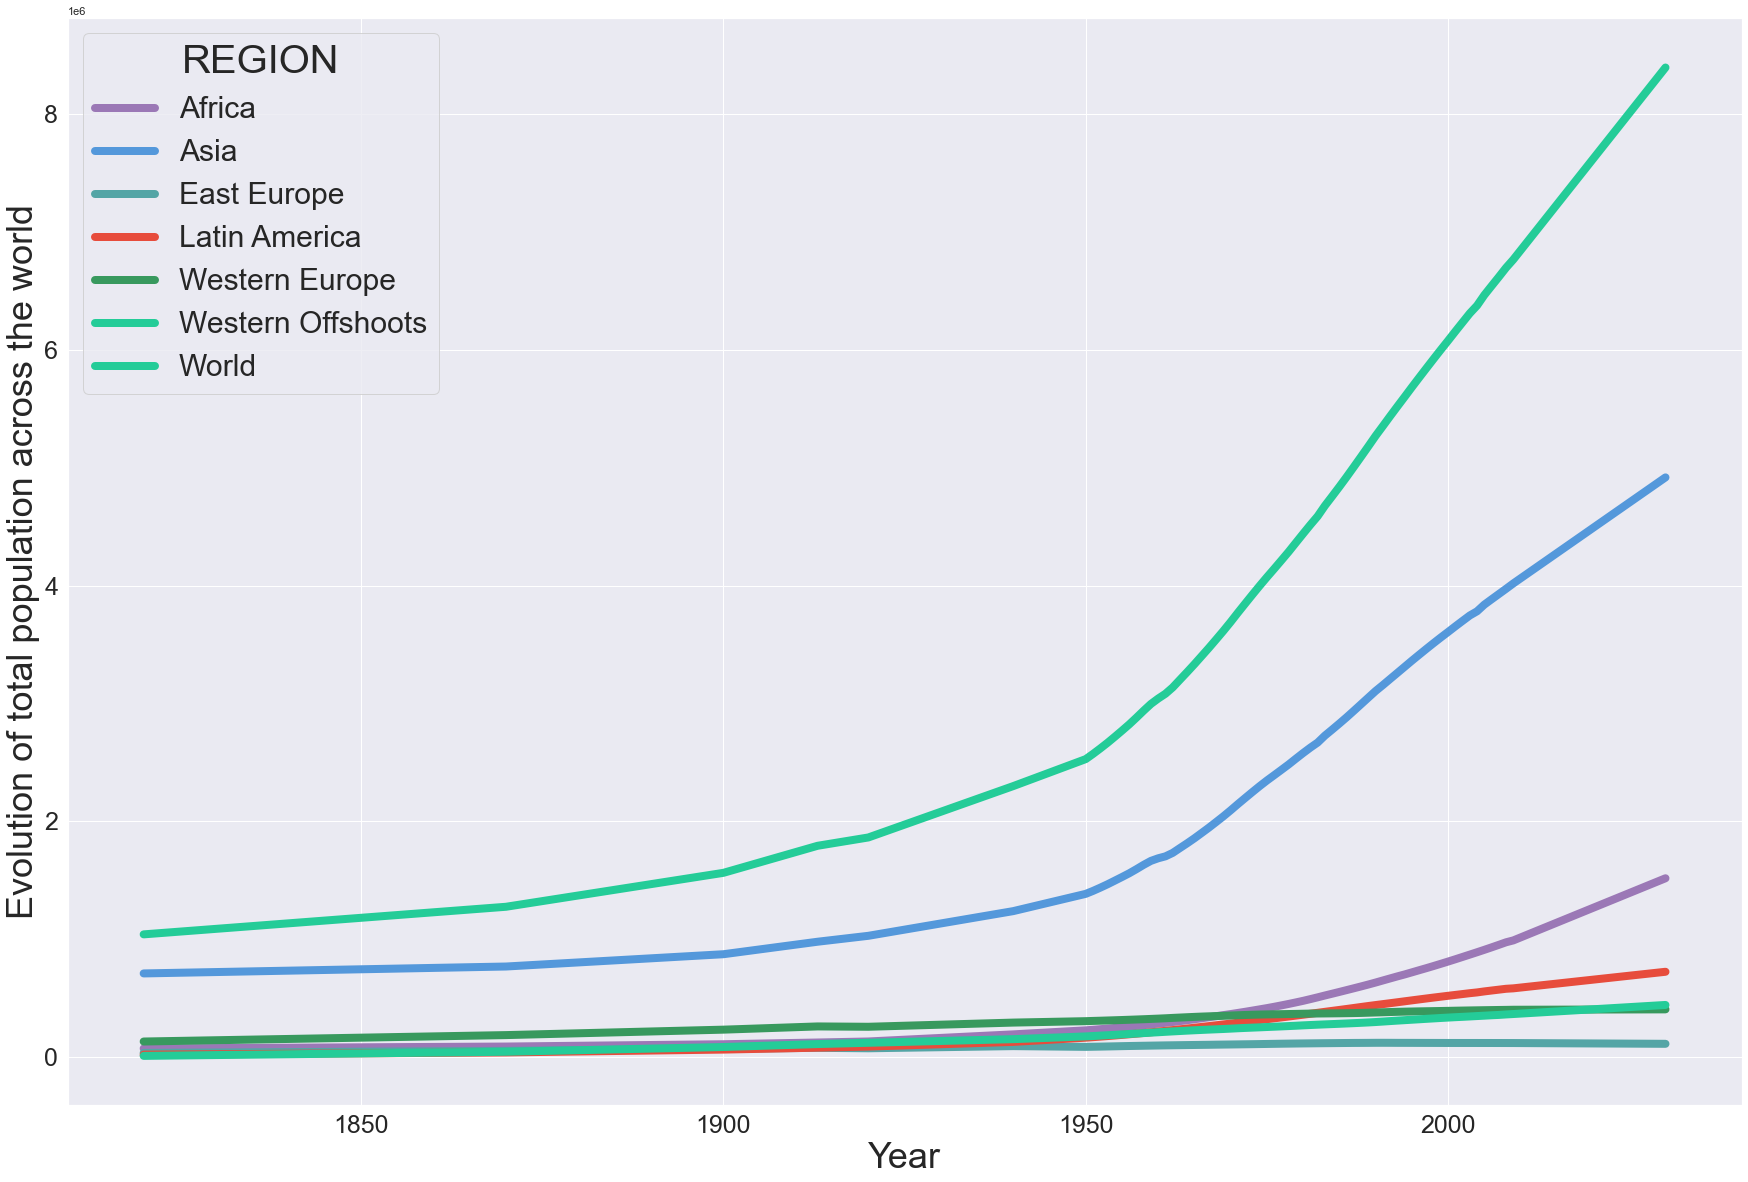

In [38]:
fig, ax = plt.subplots(figsize=(30,20))
pop_1.loc[1800:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=25)
ax.tick_params(axis = 'both', which = 'minor', labelsize=10)
ax.legend(prop={'size': 30}).set_title("REGION", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Evolution of total population across the world', fontsize=36)

## PARTE 3

In [59]:

if not os.path.exists(pathout + 'Fertilitywb.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'Fertilitywb.xls')

In [60]:
if not os.path.exists(pathout + 'Mortalitywb.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.CDRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'Mortalitywb.xls')

In [61]:
if not os.path.exists(pathout + 'Lifewb.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'Lifewb.xls')

In [62]:
fer = pd.read_excel(pathout + 'Fertilitywb.xls', sheet_name="Data", skiprows=3)
Mor = pd.read_excel(pathout + 'Mortalitywb.xls', sheet_name="Data", skiprows=3)
life = pd.read_excel(pathout + 'Lifewb.xls', sheet_name="Data", skiprows=3)

In [63]:
fer = fer.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)
Mor = Mor.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)
life = life.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)

In [64]:
fer= fer[[col for col in fer.columns if str(col).startswith('2019')==False]]
Mor= Mor[[col for col in Mor.columns if str(col).startswith('2019')==False]]
life= life[[col for col in life.columns if str(col).startswith('2019')==False]]

In [65]:
fer=fer.T
Mor=Mor.T
life=life.T

In [66]:
headersfer = fer.iloc[0]
fer = pd.DataFrame(fer.values[1:], columns=headersfer)

In [67]:
headersMor = Mor.iloc[0]
Mor  = pd.DataFrame(Mor.values[1:], columns=headersMor)

In [68]:
fer['World Total Fertility']=fer[:].mean(axis=1,skipna=True)
Mor['World Total Mortaliy']=Mor[:].mean(axis=1,skipna=True)
life['World Total Life Expectancy']=life[:].mean(axis=1,skipna=True)

In [69]:
Final_fer = fer[['World Total Fertility']]
Final_Mor = Mor[['World Total Mortaliy']]
Final_life = life[['World Total Life Expectancy']]

In [72]:
fig, ax = plt.subplots(figsize=20,10))
Final_fer.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=28)
ax.tick_params(axis = 'both', which = 'minor', labelsize=10)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 20}).set_title("Total Fertility Rate", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Fertility Rate', fontsize=36)

SyntaxError: invalid syntax (<ipython-input-72-5bbde0088b0a>, line 1)